# Time-Series Forecasting With ARIMA

In [1]:
# Importing the packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os

In [3]:
os.chdir(r'E:\Pyhton for Data Science and Machine Learning')
airline = pd.read_csv('data.csv')
airline = pd.read_csv('data.csv', index_col ='month', parse_dates = True) 
airline.head()

,air
month,
2049-01-01,112
2049-02-01,118
2049-03-01,132
2049-04-01,129
2049-05-01,121


In [4]:
result = seasonal_decompose(airline['air'],  model ='multiplicative')

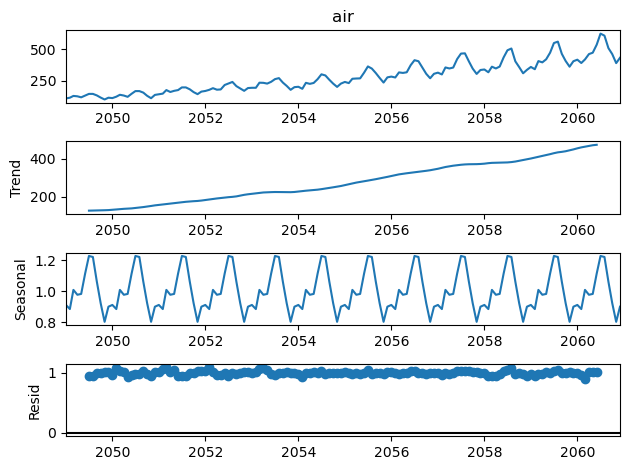

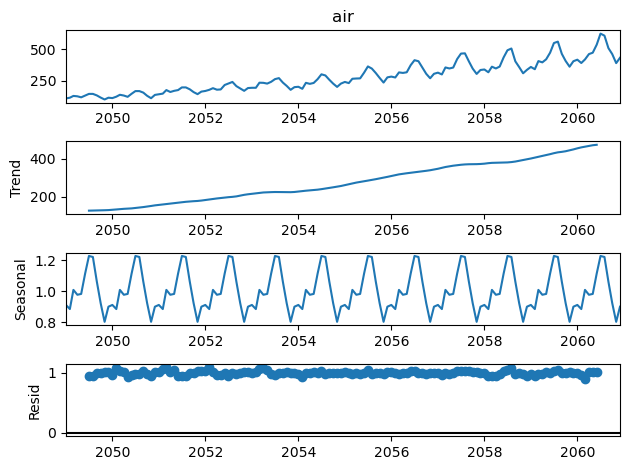

In [5]:
result.plot()

In [6]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore")

In [7]:
stepwise_fit = auto_arima(airline['air'], start_p = 1, start_q = 1,max_p = 8, max_q = 8, m = 12, start_P = 0, seasonal = True, 
 d = 1, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,   stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.21 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.12 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.21 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.17 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.58 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [8]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sun, 09 Jun 2024   AIC                           1019.178
Time:                                     09:32:16   BIC                           1030.679
Sample:                                 01-01-2049   HQIC                          1023.851
                                      - 12-01-2060                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
len(airline)

144

In [10]:
# Split data into train and test sets 

train = airline.iloc[:132] 
len(train)

132

In [11]:
test = airline.iloc[132:] 
len(test)

12

In [12]:
model = SARIMAX(train['air'], order = (0, 1, 1), seasonal_order =(2, 1, [], 12))

In [13]:
result = model.fit()

In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 air   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -446.830
Date:                             Sun, 09 Jun 2024   AIC                            901.659
Time:                                     09:35:44   BIC                            912.776
Sample:                                 01-01-2049   HQIC                           906.173
                                      - 12-01-2059                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2556      0.080     -3.190      0.001      -0.413      -0.099
ar.S.L12      -0.0962      0.090     -1.073      0.283      -0.272       0.080
ar.S.L24       0.1454      0.101      1.445      0.149      -0.052       0.343
sigma2       106.2407     15.243      6.970      0.000      76.364     136.117
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.86   Prob(JB):                         0.99
Heteroskedasticity (H):               1.63   Skew:                             0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# Predictions for one year against the test set 

predictions = result.predict(132, 143, typ = 'levels').rename("Predictions") 
len(predictions)

12

<AxesSubplot:xlabel='month'>

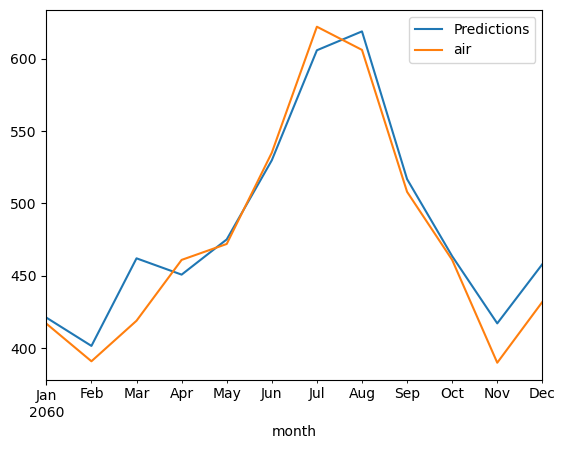

In [16]:
# Plot

predictions.plot(legend = True) 
test['air'].plot(legend = True)

In [17]:
# Mape

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
mean_absolute_percentage_error(test['air'],predictions)

3.1532152598966947

In [19]:
# Train the model on the entire dataset 

model = SARIMAX(airline['air'], order = (0, 1, 1), seasonal_order =(2, 1, [], 12))

In [20]:
result = model.fit()

In [21]:
# Forecasting for the next 3 years 

forecast = result.predict(start = len(airline), end = (len(airline)-1) + 3 * 12, typ = 'levels').rename('Forecast')

<AxesSubplot:xlabel='month'>

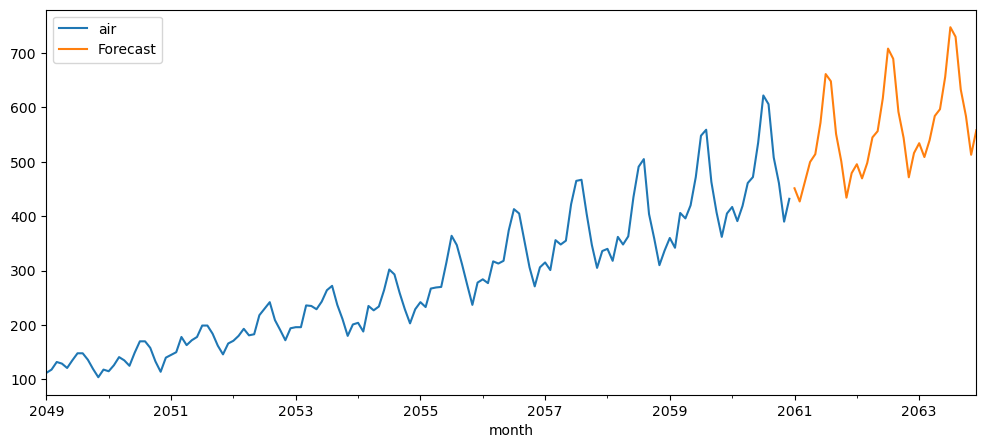

In [22]:
# Plotting the forecast values 

airline['air'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True)

Due To Sysytematic Change Of Variance Using Log 

In [23]:
# Importing the packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os

In [24]:
os.chdir(r'E:\Pyhton for Data Science and Machine Learning')
airline = pd.read_csv('data.csv')
airline = pd.read_csv('data.csv', index_col ='month', parse_dates = True) 
airline.head()

,air
month,
2049-01-01,112
2049-02-01,118
2049-03-01,132
2049-04-01,129
2049-05-01,121


In [25]:
# log transform

airline["air"] = np.log10(airline["air"])

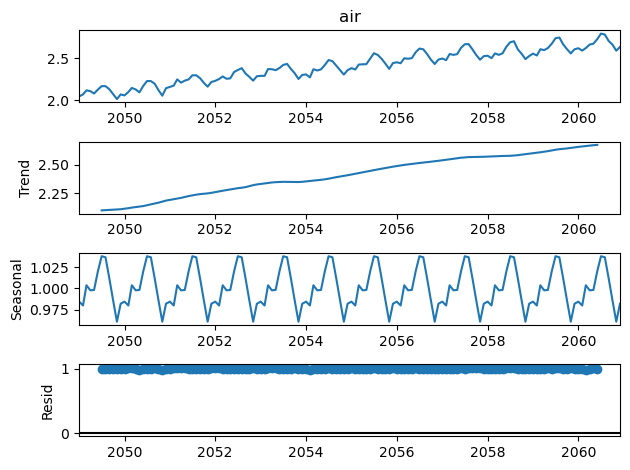

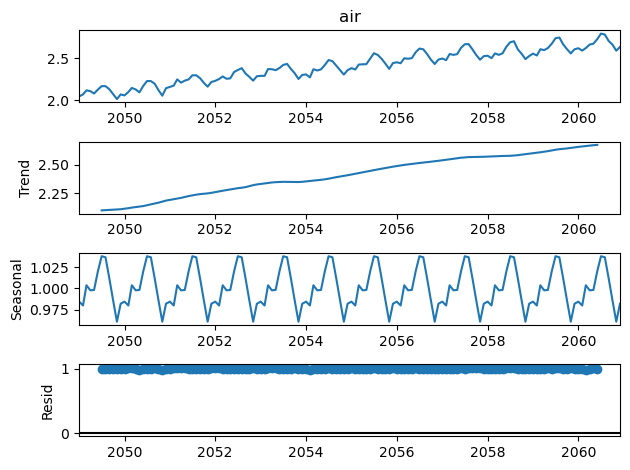

In [26]:
result = seasonal_decompose(airline['air'],  model ='multiplicative') 
result.plot()

In [27]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore")

In [28]:
stepwise_fit = auto_arima(airline['air'], start_p = 1, start_q = 1,max_p = 8, max_q = 8, m = 12, start_P = 0, seasonal = True, 
 d = 1, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,   stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-700.397, Time=0.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-653.346, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-693.328, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-701.909, Time=0.31 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-668.495, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-700.423, Time=0.85 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-700.472, Time=0.78 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-695.904, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-698.418, Time=0.93 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-686.069, Time=0.15 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-699.580, Time=0.25 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-700.000, Time=0.19 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-697.916, Time=0.60 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=-699.917, Time=0.42 sec

Best model:  ARIMA

In [29]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 353.955
Date:                            Sun, 09 Jun 2024   AIC                           -701.909
Time:                                    09:48:10   BIC                           -693.283
Sample:                                01-01-2049   HQIC                          -698.404
                                     - 12-01-2060                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4022      0.073     -5.508      0.000      -0.545      -0.259
ma.S.L12      -0.5584      0.096     -5.801      0.000      -0.747      -0.370
sigma2         0.0003   2.79e-05      9.120      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.84   Prob(JB):                         0.39
Heteroskedasticity (H):               0.58   Skew:                             0.02
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
len(airline)

144

In [31]:
# Split data into train and test sets

train = airline.iloc[:132] 
len(train)

132

In [32]:
test = airline.iloc[132:] 
len(test)

12

In [33]:
model = SARIMAX(train['air'], order = (0, 1, 1), seasonal_order =(0, 1, 1, 12))

In [34]:
result = model.fit()

In [35]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                air   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 322.876
Date:                            Sun, 09 Jun 2024   AIC                           -639.753
Time:                                    09:51:13   BIC                           -631.415
Sample:                                01-01-2049   HQIC                          -636.367
                                     - 12-01-2059                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3480      0.081     -4.295      0.000      -0.507      -0.189
ma.S.L12      -0.5628      0.094     -5.962      0.000      -0.748      -0.378
sigma2         0.0002   2.91e-05      8.494      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.93   Prob(JB):                         0.56
Heteroskedasticity (H):               0.38   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
# Predictions for one-year against the test set 

predictions = result.predict(132, 143, typ = 'levels').rename("Predictions") 
len(predictions)

12

<AxesSubplot:xlabel='month'>

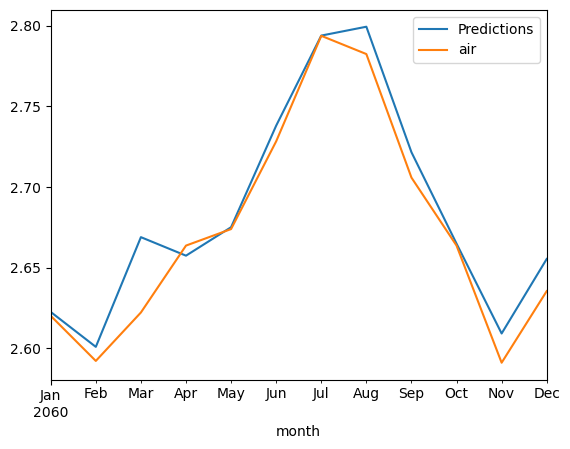

In [37]:
# Plot

predictions.plot(legend = True) 
test['air'].plot(legend = True)

In [38]:
# Mape

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [39]:
mean_absolute_percentage_error(test['air'],predictions)

0.4618166515337221

In [41]:
# Train the model on the entire dataset 

model = SARIMAX(airline['air'], order = (0, 1, 1), seasonal_order =(0, 1, 1, 12))

In [42]:
result = model.fit()

In [43]:
# Forecasting for the next 3 years

forecast = result.predict(start = len(airline), end = (len(airline)-1) + 3 * 12, typ = 'levels').rename('Forecast')

In [44]:
# Anti log10 (10 to the power)

forecast = np.power(10,forecast)

In [45]:
#importing the original dataset

airline = pd.read_csv('data.csv', index_col ='month', parse_dates = True)

<AxesSubplot:xlabel='month'>

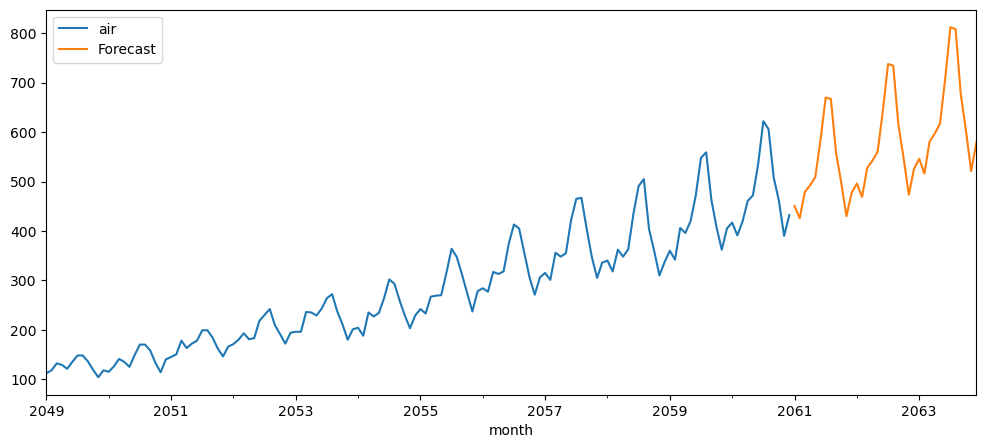

In [46]:
# Plotting the forecast values 

airline['air'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True)